# CDC report on diabetes

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df=pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [10]:
#this shows the data has 101766 rows and 50 columns. 
df.shape

(101766, 50)

In [14]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [12]:
#Output False shows there is no null values in the dataset. 
df.isnull().values.any()

False

In [17]:
#dropping some columns from the dataframe
df.drop(['encounter_id','weight','admission_type_id','discharge_disposition_id','admission_source_id','payer_code','medical_specialty','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone'],axis=1,inplace=True)

In [18]:
df.head()

,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),1,41,0,1,0,0,...,250.83,?,?,1,None,None,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),3,59,0,18,0,0,...,276,250.01,255,9,None,None,Up,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,...,648,250,V27,6,None,None,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),2,44,1,16,0,0,...,8,250.43,403,7,None,None,Up,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,51,0,8,0,0,...,197,157,250,5,None,None,Steady,Ch,Yes,NO


In [19]:
#renaming the varialbes
df.rename(columns={'patient_nbr':'Patient_number','diag_1':'Primary_diagnosis','diag_2':'Secondary_diagnosis','diag_3':'Additional_diagnosis',},inplace=True)

In [20]:
df.head()

,Patient_number,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,Primary_diagnosis,Secondary_diagnosis,Additional_diagnosis,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),1,41,0,1,0,0,...,250.83,?,?,1,None,None,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),3,59,0,18,0,0,...,276,250.01,255,9,None,None,Up,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,...,648,250,V27,6,None,None,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),2,44,1,16,0,0,...,8,250.43,403,7,None,None,Up,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,51,0,8,0,0,...,197,157,250,5,None,None,Steady,Ch,Yes,NO


In [24]:
#grouping patients by gender
df.groupby(['gender'])['Patient_number'].count()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: Patient_number, dtype: int64

<AxesSubplot:xlabel='gender'>

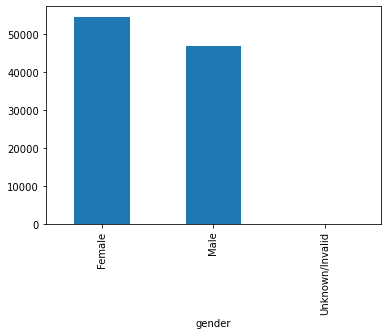

In [23]:
df.groupby(['gender'])['Patient_number'].count().plot.bar()

In [28]:
df_race=df.groupby(['race'])['Patient_number'].count()
df_race

race
?                   2273
AfricanAmerican    19210
Asian                641
Caucasian          76099
Hispanic            2037
Other               1506
Name: Patient_number, dtype: int64

In [37]:
df['race'].fillna('?'=='Undetermined',inplace=True)

In [38]:
#an attempt to rename ? to Undetermined. 
df_race

race
?                   2273
AfricanAmerican    19210
Asian                641
Caucasian          76099
Hispanic            2037
Other               1506
Name: Patient_number, dtype: int64

In [43]:
new_df=df.fillna({
    'race':'Undetermined'
})
new_df.head(20)

,Patient_number,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,Primary_diagnosis,Secondary_diagnosis,Additional_diagnosis,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),1,41,0,1,0,0,...,250.83,?,?,1,None,None,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),3,59,0,18,0,0,...,276,250.01,255,9,None,None,Up,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,...,648,250,V27,6,None,None,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),2,44,1,16,0,0,...,8,250.43,403,7,None,None,Up,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,51,0,8,0,0,...,197,157,250,5,None,None,Steady,Ch,Yes,NO
5,82637451,Caucasian,Male,[50-60),3,31,6,16,0,0,...,414,411,250,9,None,None,Steady,No,Yes,>30
6,84259809,Caucasian,Male,[60-70),4,70,1,21,0,0,...,414,411,V45,7,None,None,Steady,Ch,Yes,NO
7,114882984,Caucasian,Male,[70-80),5,73,0,12,0,0,...,428,492,250,8,None,None,No,No,Yes,>30
8,48330783,Caucasian,Female,[80-90),13,68,2,28,0,0,...,398,427,38,8,None,None,Steady,Ch,Yes,NO
9,63555939,Caucasian,Female,[90-100),12,33,3,18,0,0,...,434,198,486,8,None,None,Steady,Ch,Yes,NO


In [45]:
new_df=df.replace('?','Undetermined')

In [46]:
#replace ? to Undetermined
new_df.groupby(['race'])['Patient_number'].count()

race
AfricanAmerican    19210
Asian                641
Caucasian          76099
Hispanic            2037
Other               1506
Undetermined        2273
Name: Patient_number, dtype: int64

<AxesSubplot:ylabel='Patient_number'>

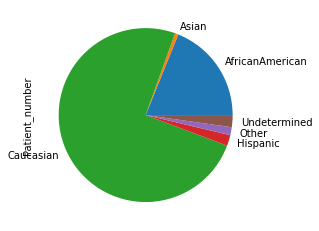

In [47]:
new_df.groupby(['race'])['Patient_number'].count().plot.pie()